Ознакомьтесь с описанием данных и скачайте датасет netflix_titles.csv с сайта Kaggle.com: https://www.kaggle.com/shivamb/netflix-shows

1. Загрузите датасет и постройте столбчатую диаграмму с количеством фильмом/сериалов на протяжении с 2010 по 2016. По оси x - год выпуска, по y - количество фильмов и сериалов.

2. Постройте один график, показывающий как много фильмов и сериалов выпускались на всем промежутке времени. По оси x - год выпуска, по y - количество фильмов и сериалов.

3. Постройте стобчатую диаграмму, на которой отобразите количество сериалов, представленных в данных, по сезонам (ограничьтесь 10 самыми популярными количествами сезонов). По оси x - количество сезонов, по y - количество сериалов. Сделайте так, чтобы количество сезонов по оси ординат не накладывались друг на друга.

4. Постройте pie диаграмму, показывающую соотношение количества сериалов к фильмам. Отобразите процентное соотношение на графике и название частей.

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
CREDIT_CARD_FRAUD_PATH = './netflix_titles.csv'

In [4]:
netflix_movies = pd.read_csv(CREDIT_CARD_FRAUD_PATH)
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [221]:
netflix_movie_count_10_16 = \
netflix_movies.release_year[((2010 <= netflix_movies.release_year) & (netflix_movies.release_year <= 2019))]
netflix_movie_count_10_16

1       2016
2       2011
5       2016
6       2019
8       2019
        ... 
7780    2018
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 5711, dtype: int64

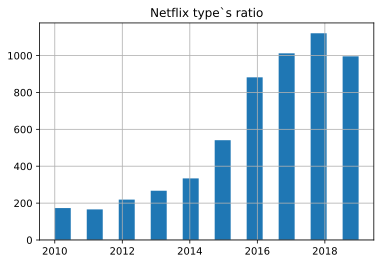

In [222]:
netflix_movie_count_10_16.hist(bins=19)
plt.title('Netflix type`s ratio')
plt.show()

In [223]:
netflix_movies_by_year = pd.pivot_table(netflix_movies, values='show_id', aggfunc='count', index='release_year')
netflix_movies_by_year

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


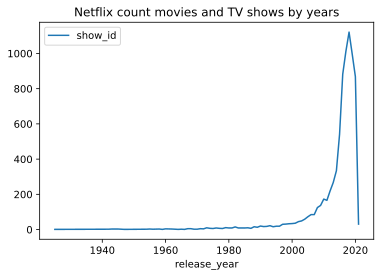

In [225]:
netflix_movies_by_year.plot()
plt.title('Netflix count movies and TV shows by years')
plt.show()

In [227]:
netflix_movies_top10_longest = \
pd.DataFrame(netflix_movies.duration[netflix_movies.duration.str.contains('Season\w', regex=True)].value_counts().nlargest(10))
netflix_movies_top10_longest.reset_index()

,index,duration
0,2 Seasons,382
1,3 Seasons,184
2,4 Seasons,87
3,5 Seasons,58
4,6 Seasons,30
5,7 Seasons,19
6,8 Seasons,18
7,9 Seasons,8
8,10 Seasons,6
9,11 Seasons,3


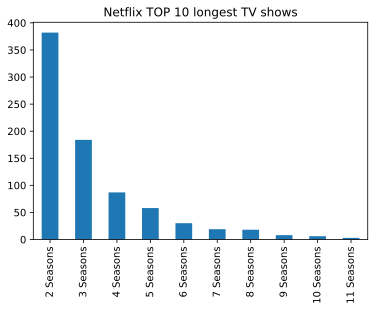

In [228]:
netflix_movies_top10_longest['duration'].plot(kind="bar")
plt.title('Netflix TOP 10 longest TV shows')
plt.show()

In [191]:
netflix_movies_ratio = netflix_movies.pivot_table(index="type", aggfunc="count", values="show_id")
netflix_movies_ratio.reset_index(inplace=True)

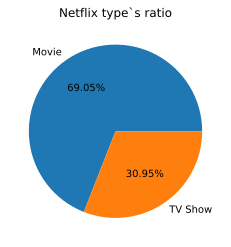

In [207]:
fig = plt.figure()
plt.pie(netflix_movies_ratio.show_id, labels=netflix_movies_ratio.type, autopct='%1.2f%%')
plt.title('Netflix type`s ratio')
plt.show()